# 3 лаба: метод стрельбы и квазилинеаризации

$$y'' + sin(y) = 0, 0 < x < x_k$$
$$ y(0) = 0, y(x_k) = pi $$
$$x_k = 0.5, 1, 2, 4, 6$$


Преобразуем для метода стрельбы в ОДУ:

$ u' = v $  
$ v' = -sin(u) $

- Выбираем z
- Решаем задачу Коши
- Смотрим расхождение
- Корректируем z
- Повторяем

Решение для x_k = 0.5: y(x_k) = 3.1415927204787106
Решение для x_k = 1: y(x_k) = 3.141592832967115
Решение для x_k = 2: y(x_k) = 3.141592712609966
Решение для x_k = 4: y(x_k) = 3.1415931103298735
Решение для x_k = 6: y(x_k) = 3.141592779685586


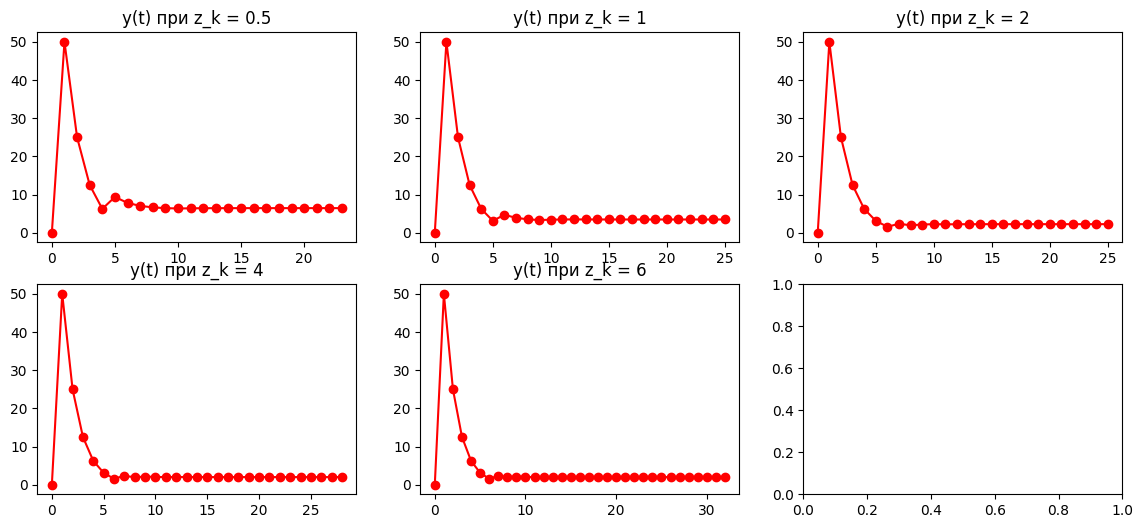

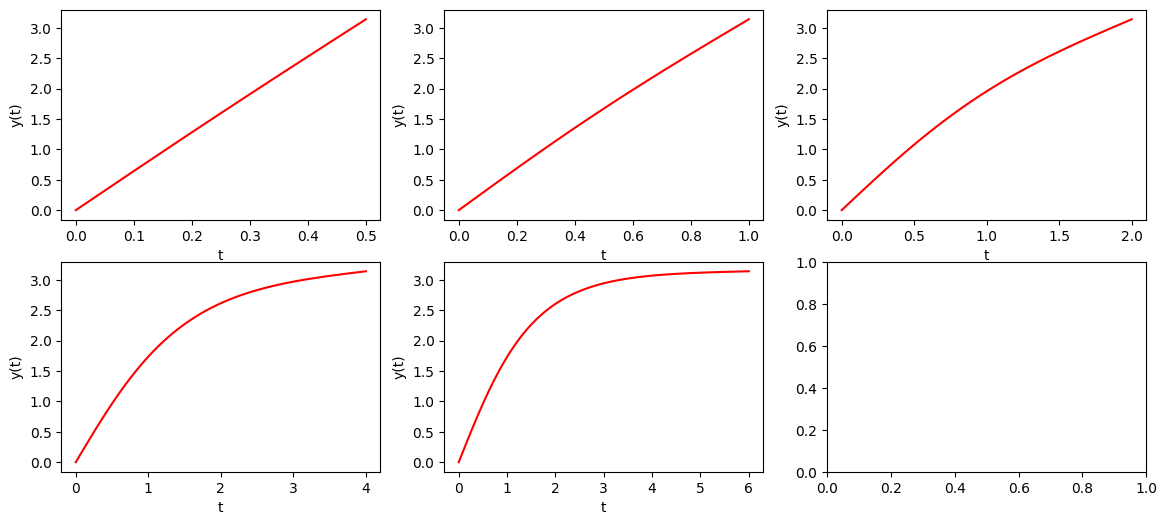

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_system(x, y):
    u, v = y
    return [v, -np.sin(u)]

def shooting_method(x_k):

    def diff_sol(z):
        # Решаем задачу Коши с помощью scipy юхууу
        sol = solve_ivp(ode_system, [0, x_k], [0, z], dense_output=True)
        return sol.y[0, -1] - np.pi

    # Поиск значения z методом бисекции
    z_values = []
    z_left = -100
    z_right = 100
    z = (z_left + z_right) / 2
    while abs(diff_sol(z)) > 1e-6:
        
        z_values.append(z)
        
        if diff_sol(z) > 0:
            z_right = z
        else:
            z_left = z
        z = (z_left + z_right) / 2

    # Решение задачи Коши с найденным z
    sol = solve_ivp(ode_system, [0, x_k], [0, z], dense_output=True)
    # sol.sol(np.linspace(0, x_k, 100))[0]
    return sol, z_values

# Вызов метода стрельбы для x_k = 0.5
x_k = [0.5, 1, 2, 4, 6]

fig, ax = plt.subplots(2, 3, figsize=(14, 6))
fig1, bx = plt.subplots(2, 3, figsize=(14, 6))

for i in range(len(x_k)):
    sol, z_values = shooting_method(x_k[i])
    
    print(f"Решение для x_k = {x_k[i]}: y(x_k) = {sol.sol(x_k[i])[0]}")
    
    ax[i // 3, i % 3].plot([i for i in range(len(z_values))], z_values, marker='o', color='red')
    ax[i // 3, i % 3].set_title("Поиск z при z_k = " + str(x_k[i]))
    
    t_values = np.linspace(0, x_k[i], 100)
    y_values = sol.sol(t_values)[0]
    bx[i // 3, i % 3].plot(t_values, y_values, marker='', color='red')
    ax[i // 3, i % 3].set_title("y(t) при z_k = " + str(x_k[i]))
    bx[i // 3, i % 3].set_xlabel('t')
    bx[i // 3, i % 3].set_ylabel('y(t)')
    



# Метод квазилинеаризации

1. Линеаризация уравнения:  
    $$ sin(y) ≈ sin(y_i) + cos(y_i) * (y - y_i) $$
    $$ y'' + cos(y_i) * y = sin(y_i) - cos(y_i) * y_i $$

2. Решение линейной краевой задачи  
    Будем использовать метод конечных разностей.

Повторяем

Решение для x_k = 0.5: y(x_k) = 3.141592653589793
Решение для x_k = 1: y(x_k) = 3.141592653589793
Решение для x_k = 2: y(x_k) = 3.141592653589793
Решение для x_k = 4: y(x_k) = 3.141592653589793
Решение для x_k = 6: y(x_k) = 3.141592653589793


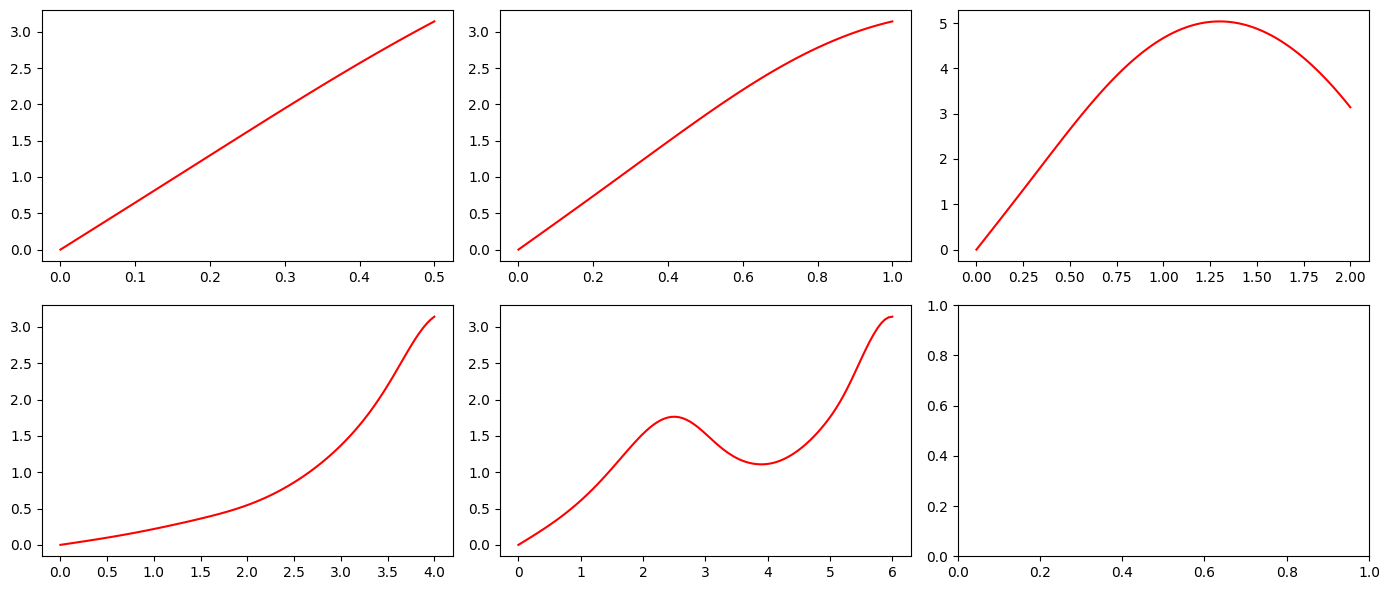

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

def quasilinearization_method(x_k, y_a, y_b, N=100, epsilon=1e-6, max_iter=100000):
    x = np.linspace(0, x_k, N + 1)
    h = x[1] - x[0]

    # Начальное приближение
    y = np.linspace(y_a, y_b, N + 1)
    y[0] = 0
    y[-1] = y_b

    
    for j in range(max_iter):
        # Матрица и вектор правой части
        A = np.zeros((N + 1, N + 1))
        b = np.zeros(N + 1)

        # Граничные условия
        A[0, 0] = 1
        b[0] = y_a
        A[-1, -1] = 1
        b[-1] = y_b

        # Внутренняя часть
        for i in range(1, N):
            A[i, i - 1] = 1 / h**2
            A[i, i] = - 2 / h**2 - np.cos(y[i])
            A[i, i + 1] = 1 / h**2
            b[i] = - np.sin(y[i]) + np.cos(y[i]) * y[i]


        y_new = spsolve(csc_matrix(A), b)
        if np.max(np.abs(y_new - y)) < epsilon:
            break

        y = y_new

    return x, y


# x_k = 0.5 # Конечное значение x
y_a = 0 # Граничное условие y(0)
y_b = np.pi # Граничное условие y(x_k)


x_k = [0.5, 1, 2, 4, 6]

fig, ax = plt.subplots(2, 3, figsize=(14, 6))
# fig1, bx = plt.subplots(2, 3, figsize=(14, 6))

for i in range(len(x_k)):
    x, y = quasilinearization_method(x_k[i], y_a, y_b)
    print(f"Решение для x_k = {x_k[i]}: y(x_k) = {y[-1]}")
    
    
    ax[i // 3, i % 3].plot(x, y, marker='', color='red')
    # ax[i // 3, i % 3].set_title("Поиск z при z_k = " + str(x_k[i]))
    
    # t_values = np.linspace(0, x_k[i], 100)
    # y_values = sol.sol(t_values)[0]
    # bx[i // 3, i % 3].plot(t_values, y_values, marker='', color='red')
    # ax[i // 3, i % 3].set_title("y(t) при z_k = " + str(x_k[i]))
    # bx[i // 3, i % 3].set_xlabel('t')
    # bx[i // 3, i % 3].set_ylabel('y(t)')

plt.tight_layout()
plt.show()

Считается он конечно долго...